In [189]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [190]:
#Generate random noise in our data
X=np.linspace(0,2,num=200)
Y=np.sin(np.pi*X)
for i in range(len(Y)):
    dummy=random.choice([-1,1])
    Y[i]=Y[i]+(dummy*random.random())/4
    

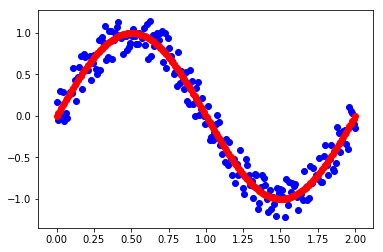

In [191]:
#Visualizing the data
#red points represent sin(pi*x) 
#blue points represent our data( after introducing noise )
plt.scatter(X,Y,c='blue')
plt.scatter(X,np.sin(np.pi*X),c='red')

### When M=1, the program represents linear regression
### When M>1, the program represents polynomial regression

In [192]:
#features cosidering a cubic polynomial for fitting 
#Change M as per requirement
f0= [1]*len(X)
M=4
F=f0
#f1= X
#f2= X**2
#f3= X**3
#F=np.column_stack([f0,f1,f2,f3])
#Generalizing for M degree
for i in range(1,M+1):
    F = np.column_stack([F, X**i])

In [193]:
F

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.00502513e-02, 1.01007550e-04, 1.01515126e-06,
        1.02025252e-08],
       [1.00000000e+00, 2.01005025e-02, 4.04030201e-04, 8.12121008e-06,
        1.63240404e-07],
       [1.00000000e+00, 3.01507538e-02, 9.09067953e-04, 2.74090840e-05,
        8.26404543e-07],
       [1.00000000e+00, 4.02010050e-02, 1.61612081e-03, 6.49696806e-05,
        2.61184646e-06],
       [1.00000000e+00, 5.02512563e-02, 2.52518876e-03, 1.26893907e-04,
        6.37657826e-06],
       [1.00000000e+00, 6.03015075e-02, 3.63627181e-03, 2.19272672e-04,
        1.32224727e-05],
       [1.00000000e+00, 7.03517588e-02, 4.94936997e-03, 3.48196882e-04,
        2.44962631e-05],
       [1.00000000e+00, 8.04020101e-02, 6.46448322e-03, 5.19757445e-04,
        4.17895433e-05],
       [1.00000000e+00, 9.04522613e-02, 8.18161158e-03, 7.40045268e-04,
        6.69387680e-05],
       [1.00000000e+00, 1.0050

## Using Normal Equation

In [194]:
#Given data we have, w0f0+w1f1+w2f2+w3f3=y
#Using normal equation, we find W=[w0,w1,w2,w3] 
#Normal eqn: (transpose(F)*F)*W = transpose(F)*(Y(column))
tff=np.matmul(np.transpose(F),F)
tff_inv=np.linalg.inv(tff)
W= np.matmul(np.matmul(tff_inv,np.transpose(F)), Y.reshape(len(X),1))

In [195]:
W

array([[-1.82149537e-01],
       [ 5.81933862e+00],
       [-8.44331693e+00],
       [ 2.79879829e+00],
       [ 6.50171199e-03]])

In [196]:
#Making gridlines for visualizing our results
xx=np.linspace(0,2,50)
yy=W[0]
#yy=W[0]*1 + W[1]*xx + W[2]*(xx ** 2) + W[3]*(xx**3)
#Generalizing
for i in range(1,len(W)):
    yy=yy+ W[i]*(xx**i)

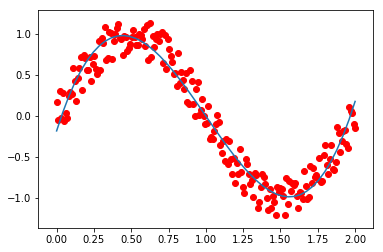

In [197]:
plt.plot(xx,yy)
plt.scatter(X,Y,c='red')

# Using Gradient Descent

In [230]:
#initialize W2
W2=np.ones((M+1,1))

In [231]:
#Calculating Ypredicted
Ypr= np.matmul(F,W2)

In [232]:
#define cost function/ optimization function
costfxn=np.sqrt(((Ypr-Y.reshape(Ypr.shape))**2).sum())

In [233]:
#Gradient Descent step
cost=[costfxn]
for epoch in range(1000000):
    Ypr=np.matmul(F,W2)
    W2=W2 - 0.00005*np.matmul(np.transpose(F), Ypr-Y.reshape(Ypr.shape))
    cost.append(np.sqrt(((Ypr-Y.reshape(Ypr.shape))**2).sum()))

### Warning
The learning rate(0.00005) and the no. of epochs have to be manually selected by trial and error. 
Learning rate must be small enough so that cost doesn't overshoot the minima but big enough for less error within no. of steps 

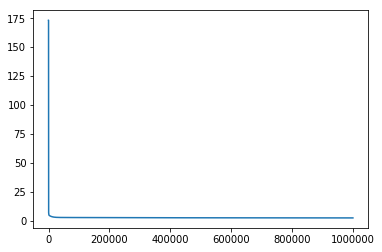

In [235]:
#plotting cost over iteration
plt.plot(np.linspace(1,1000001,1000001).tolist(),cost)

In [236]:
yy2=0
for i in range(1,len(W2)):
    yy2=yy2+ W2[i]*(xx**i)

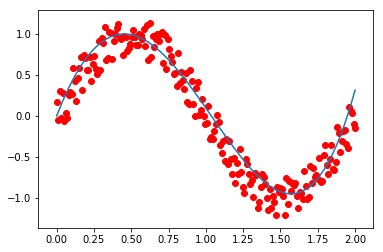

In [237]:
#plotting prediction
plt.plot(xx,yy2)
plt.scatter(X,Y,c='red')

## Analysing our model

In [205]:
ypr1=W[0]
for i in range(1,len(W)):
    ypr1=ypr1+ W[i]*(X**i)

In [206]:
#The predicted values using normal equation
ypr1

array([-0.18214954, -0.12451372, -0.06856653, -0.01429092,  0.03833016,
        0.08931376,  0.13867695,  0.18643676,  0.23261027,  0.27721453,
        0.32026661,  0.36178355,  0.40178244,  0.44028033,  0.47729429,
        0.51284139,  0.5469387 ,  0.5796033 ,  0.61085224,  0.64070262,
        0.66917151,  0.69627598,  0.72203311,  0.74646   ,  0.76957371,
        0.79139134,  0.81192997,  0.83120668,  0.84923858,  0.86604274,
        0.88163627,  0.89603625,  0.90925978,  0.92132396,  0.93224589,
        0.94204266,  0.95073139,  0.95832917,  0.96485311,  0.97032032,
        0.9747479 ,  0.97815297,  0.98055264,  0.98196401,  0.98240421,
        0.98189035,  0.98043955,  0.97806893,  0.97479561,  0.97063672,
        0.96560937,  0.95973069,  0.95301782,  0.94548787,  0.93715799,
        0.9280453 ,  0.91816694,  0.90754004,  0.89618175,  0.88410919,
        0.87133951,  0.85788986,  0.84377736,  0.82901918,  0.81363246,
        0.79763434,  0.78104198,  0.76387252,  0.74614312,  0.72

In [238]:
ypr2=W2[0]
for i in range(1,len(W2)):
    ypr2=ypr2+ W[i]*(X**i)

In [239]:
#The predicted values using gradient descent 
ypr2

array([-0.06416754, -0.00653173,  0.04941546,  0.10369107,  0.15631215,
        0.20729576,  0.25665894,  0.30441876,  0.35059227,  0.39519653,
        0.4382486 ,  0.47976555,  0.51976443,  0.55826232,  0.59527628,
        0.63082338,  0.6649207 ,  0.69758529,  0.72883424,  0.75868461,
        0.7871535 ,  0.81425797,  0.84001511,  0.86444199,  0.8875557 ,
        0.90937333,  0.92991196,  0.94918868,  0.96722057,  0.98402473,
        0.99961826,  1.01401824,  1.02724177,  1.03930595,  1.05022788,
        1.06002466,  1.06871338,  1.07631117,  1.08283511,  1.08830231,
        1.0927299 ,  1.09613496,  1.09853463,  1.099946  ,  1.1003862 ,
        1.09987234,  1.09842154,  1.09605092,  1.0927776 ,  1.08861871,
        1.08359136,  1.07771268,  1.07099981,  1.06346987,  1.05513998,
        1.0460273 ,  1.03614893,  1.02552204,  1.01416374,  1.00209118,
        0.9893215 ,  0.97587185,  0.96175936,  0.94700118,  0.93161445,
        0.91561633,  0.89902397,  0.88185451,  0.86412511,  0.84

In [240]:
residue1=(Y-ypr1)
residue2=Y-ypr2

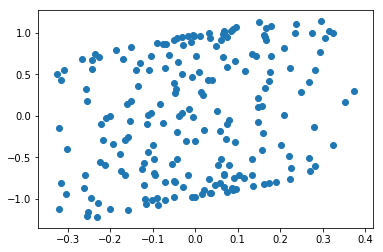

In [241]:
#The more random this graph is, the better our training model is. If this plot shows some pattern then we 
#must change our function. If there are some distant points, then we have neglected the outliers
plt.scatter(residue1,Y)

(array([14., 17., 19., 30., 30., 37., 19., 16., 12.,  6.]),
 array([-0.32395539, -0.25418436, -0.18441332, -0.11464229, -0.04487125,
         0.02489978,  0.09467082,  0.16444185,  0.23421289,  0.30398392,
         0.37375496]),
 <a list of 10 Patch objects>)

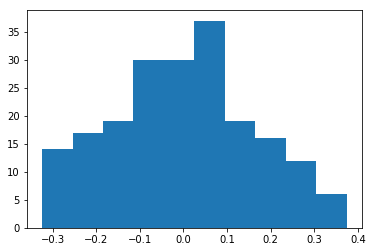

In [242]:
#The histogram of residues should show that the residuesvare spread normally with the mean being 0. 
plt.hist(residue1)

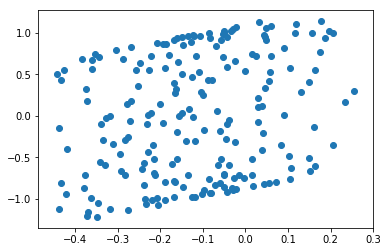

In [245]:
plt.scatter(residue2,Y)

(array([14., 17., 19., 30., 30., 37., 19., 16., 12.,  6.]),
 array([-0.44193739, -0.37216635, -0.30239532, -0.23262428, -0.16285325,
        -0.09308221, -0.02331118,  0.04645986,  0.11623089,  0.18600193,
         0.25577296]),
 <a list of 10 Patch objects>)

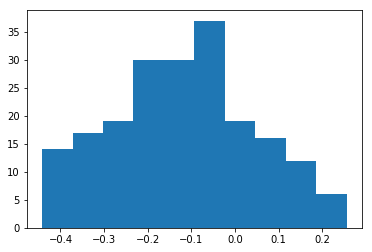

In [246]:
plt.hist(residue2)

### We see similar plots for both our methods. Our model has been trained successfully


In [243]:
#The RMS error of our normal model
np.sqrt((residue1**2).sum())

2.315232838799149

In [244]:
#The RMS error of our gradient descent model.
np.sqrt((residue2**2).sum())

2.853813801136495